In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# 讀取糖尿病資料集
diabetes = datasets.load_diabetes()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=4)

# 建立一個線性回歸模型
regr = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

In [3]:
print(regr.coef_)

[  33.40877011 -292.24672884  481.07153405  369.06269614 -966.37849405
  589.81383056  232.61924401  288.3263166   802.72704593   37.81285219]


In [4]:
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 2939.42


### LASSO

In [5]:
# 讀取糖尿病資料集
diabetes = datasets.load_diabetes()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=4)

# 建立一個線性回歸模型
lasso = linear_model.Lasso(alpha=1.0)

# 將訓練資料丟進去模型訓練
lasso.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = lasso.predict(x_test)

In [6]:
# 印出各特徵對應的係數，可以看到許多係數都變成 0，Lasso Regression 的確可以做特徵選取
lasso.coef_

array([   0.        ,   -0.        ,  321.203877  ,   57.74744332,
          0.        ,    0.        ,   -0.        ,    0.        ,
        332.41817196,    0.        ])

In [7]:
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 3505.84


### Ridge

In [8]:
# 讀取糖尿病資料集
diabetes = datasets.load_diabetes()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=4)

# 建立一個線性回歸模型
ridge = linear_model.Ridge(alpha=1.0)

# 將訓練資料丟進去模型訓練
ridge.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

In [9]:
# 印出 Ridge 的參數，可以很明顯看到比起 Linear Regression，參數的數值都明顯小了許多
print(ridge.coef_)

[  48.8125786   -85.49511577  270.22532535  201.91767903   17.41308665
  -19.04346706 -136.47737574  122.26503311  247.60074795   95.59855598]


In [10]:
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 2939.42


可以看見 LASSO 與 Ridge 的結果並沒有比原本的線性回歸來得好，
這是因為目標函數被加上了正規化函數，讓模型不能過於複雜，相當於限制模型擬和資料的能力。因此若沒有發現 Over-fitting 的情況，是可以不需要一開始就加上太強的正規化的。

## [作業重點]
使用 Sklearn 中的 Lasso, Ridge 模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義。

機器學習的模型非常多種，但要訓練的資料多半有固定的格式，確保你了解訓練資料的格式為何，這樣在應用新模型時，就能夠最快的上手開始訓練！

## 練習時間

請使用其他資料集 (boston, wine)，並調整不同的 alpha 來觀察模型訓練的情形。

In [11]:
 import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Boston

In [57]:
boston = datasets.load_boston()
X = boston.data[:, np.newaxis, 7]
x_train, x_test, y_train, y_test = train_test_split(X, boston.target, test_size=0.1, random_state=8)

#不同的回歸模型
regr = linear_model.LinearRegression()
lasso = linear_model.Lasso(alpha=1)
ridge = linear_model.Ridge(alpha=1)

#將切好資料丟進去訓練
regr.fit(x_train, y_train)
lasso.fit(x_train, y_train)
ridge.fit(x_train, y_train)

#三種預測結果
y_pred_linear= regr.predict(x_test)
y_pred_lasso = lasso.predict(x_test)
y_pred_ridge = ridge.predict(x_test)

In [58]:
print('Linear Regression Result:')
print(regr.coef_)
print('Mean squared error: %.2f\n' % mean_squared_error(y_test, y_pred_linear))
print('Lasso Regression Result:')
print(lasso.coef_)
print('Mean squared error: %.2f\n' % mean_squared_error(y_test, y_pred_lasso))
print('Ridge Regression Result:')
print(ridge.coef_)
print('Mean squared error: %.2f\n' % mean_squared_error(y_test, y_pred_ridge))

Linear Regression Result:
[ 1.18238629]
Mean squared error: 95.24

Lasso Regression Result:
[ 0.95719057]
Mean squared error: 93.67

Ridge Regression Result:
[ 1.18180137]
Mean squared error: 95.24



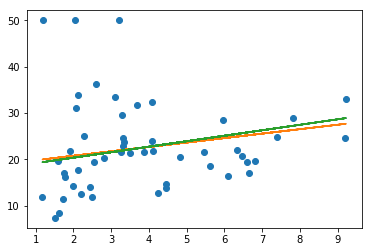

In [63]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred_linear)
plt.plot(x_test,y_pred_lasso)
plt.plot(x_test,y_pred_ridge)

# Wine

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [65]:
wine = datasets.load_wine()
train_x, test_x, train_y, test_y = train_test_split(wine.data, wine.target, test_size=0.2, random_state=4)

regr = linear_model.LinearRegression()
lasso = linear_model.Lasso(alpha=1.0)
ridge = linear_model.Ridge(alpha=1.0)

regr.fit(train_x, train_y)
lasso.fit(train_x, train_y)
ridge.fit(train_x, train_y)

y_pred_linear = regr.predict(test_x)
y_pred_lasso = lasso.predict(test_x)
y_pred_ridge = ridge.predict(test_x)

print('Linear Regression Result:')
print(regr.coef_)
print('Mean squared error: %.2f\n' % mean_squared_error(test_y, y_pred_linear))
print('Lasso Regression Result:')
print(lasso.coef_)
print('Mean squared error: %.2f\n' % mean_squared_error(test_y, y_pred_lasso))
print('Ridge Regression Result:')
print(ridge.coef_)
print('Mean squared error: %.2f\n' % mean_squared_error(test_y, y_pred_ridge))

Linear Regression Result:
[ -1.09099883e-01   1.67405249e-02  -2.18753671e-01   4.66803998e-02
   3.20692287e-04   1.24491691e-01  -3.26192950e-01  -1.91327414e-01
   3.72016066e-02   7.57429505e-02  -1.55979636e-01  -2.85946973e-01
  -7.51809245e-04]
Mean squared error: 0.07

Lasso Regression Result:
[ 0.          0.          0.          0.          0.         -0.         -0.
  0.         -0.          0.         -0.         -0.         -0.00159714]
Mean squared error: 0.42

Ridge Regression Result:
[-0.1060308   0.01767173 -0.20185208  0.04519307  0.00041456  0.09901609
 -0.31237143 -0.1038379   0.03489971  0.07770768 -0.13450626 -0.27442063
 -0.00077001]
Mean squared error: 0.07

